In [1]:
from utilidades import *
import warnings
warnings.filterwarnings('ignore')

# KMeans

O algoritmo de clusterização K-means é um dos métodos mais populares e eficientes para agrupar dados em clusters. Ele é uma técnica que procura particionar um conjunto de dados em K grupos distintos, onde cada grupo é representado por um centróide, que é a média dos pontos no cluster. O objetivo do algoritmo é minimizar a variância interna dos clusters, ou seja, tentar agrupar os pontos de modo que eles sejam semelhantes dentro de cada grupo e diferentes entre os grupos.

Passo a passo de como o algoritmo K-means funciona:

1. **Inicialização**: O algoritmo começa selecionando aleatoriamente K centróides, onde K é o número de clusters que desejamos obter. Esses centróides podem ser escolhidos a partir de amostras aleatórias dos dados ou de qualquer outra estratégia de inicialização.

2. **Atribuição de pontos ao cluster mais próximo**: Para cada ponto do conjunto de dados, o algoritmo calcula a distância entre o ponto e cada um dos centróides. O ponto é atribuído ao cluster cujo centróide está mais próximo, com base na distância euclidiana (ou outra medida de distância).

3. **Atualização dos centróides**: Uma vez que todos os pontos foram atribuídos aos clusters, o algoritmo calcula os novos centróides para cada grupo, calculando a média das coordenadas de todos os pontos no cluster.

4. **Reatribuição de pontos**: O algoritmo repete o processo de atribuição dos pontos ao cluster mais próximo, considerando os novos centróides calculados no passo anterior. Isso pode levar a uma mudança na composição dos clusters.

5. **Convergência**: Os passos 3 e 4 são repetidos em um loop até que os centróides praticamente não mudem entre iterações ou até que uma condição de parada pré-definida seja satisfeita (por exemplo, um número máximo de iterações).

O algoritmo de clusterização K-Means é popular por sua simplicidade e eficiência em dividir um conjunto de dados em grupos coesos, ser  computacionalmente eficiente e seu resultado é fácil de interpretar. Porém, a eficácia do K-Means depende da escolha do número correto de clusters, algo que pode ser subjetivo, a posição dos centróides iniciais podem levar a diferentes soluções finais, o que torna a inicialização crucial. Também assume que os clusters são esféricos, o que pode não se adequar bem a dados com formas mais complexas, além de que outliers podem afetar significativamente a formação dos clusters.


## Data

In [2]:
X_iris, y_iris, iris_target_names = get_iris_data()
X_wine, y_wine, wine_target_names = get_wine_data()
X_syn_ctrl, y_syn_ctrl, syn_ctrl_target_names = get_synthetic_control_data()

# Normalizando os dados
from scipy.stats import zscore
X_syn_ctrl = zscore(X_syn_ctrl)
X_iris = zscore(X_iris)
X_wine = zscore(X_wine)

<h1>Redução de dimensionalidade</h1>

In [3]:
from sklearn.manifold import TSNE

X_syn_ctrl_2d = TSNE().fit_transform(X_syn_ctrl)
X_wine_2d = TSNE().fit_transform(X_wine)
X_iris_2d = TSNE().fit_transform(X_iris)

# Método do Cotovelo (Elbow Method)

Leia o documento "Método do Cotovelo" para melhor entendimento.

Text(0.5, 1.0, 'Método do Cotovelo : Irís')

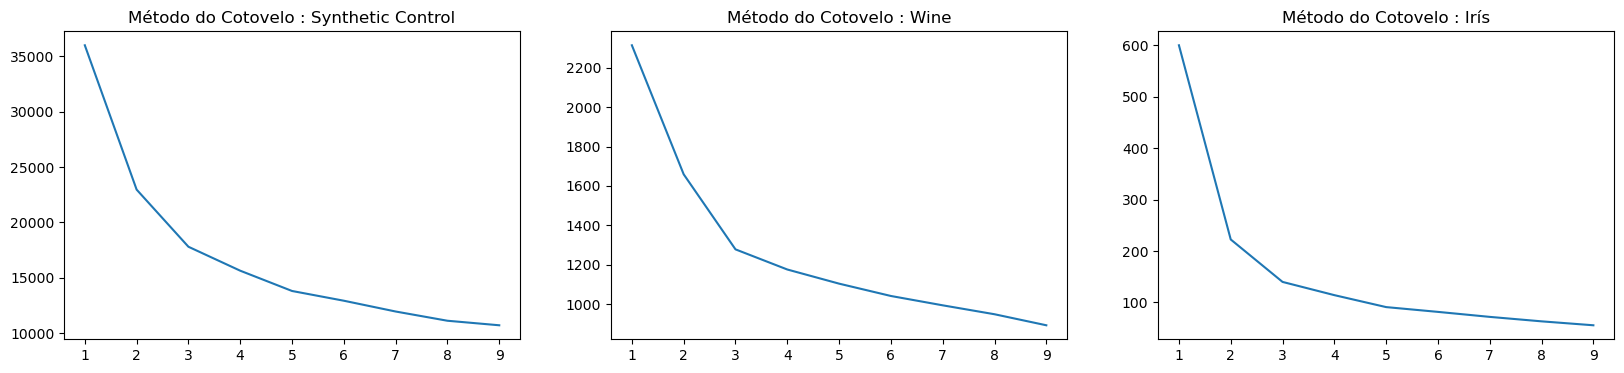

In [4]:
from sklearn.cluster import KMeans

inertia_syn_ctrl = []
inertia_wine = []
inertia_iris = []

for k in range(1, 10):
    # Aplicando o método KMeans e recuperando o valor da inércia do modelo
    inertia_syn_ctrl.append(KMeans(n_clusters = k).fit(X_syn_ctrl).inertia_)
    inertia_wine.append(KMeans(n_clusters = k).fit(X_wine).inertia_)
    inertia_iris.append(KMeans(n_clusters = k).fit(X_iris).inertia_)

# Criando a figura e os subplots
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

# Plote os dados nos subplots individuais
axs[0].plot(range(1, 10), inertia_syn_ctrl)
axs[0].set_xticks(range(1, 10))
axs[0].set_title('Método do Cotovelo : Synthetic Control')

axs[1].plot( range(1, 10), inertia_wine)
axs[1].set_xticks(range(1, 10))
axs[1].set_title('Método do Cotovelo : Wine')

axs[2].plot( range(1, 10), inertia_iris)
axs[2].set_xticks(range(1, 10))
axs[2].set_title('Método do Cotovelo : Irís')

Como podemos ver, podemos arbitrar um número de clusters k = 3 para todos os nossos pontos

**<font size=6>Importante </font>** : Como veremos mais a frente, os dados **Iris** e **Wine** realmente só possuem 3 classes. Porém o **Synthetic Control** possui 6 classes. 

# Clusterização

Agora, vamos aplicar o KMeans em nossos dados com k = 3 e visualizar os dados após a redução de dimensionalidade.

In [5]:
# O método fit_predict faz a "fitagem" dos dados e já retorna os clusters a qual cada dado pertence

km_labels_syn_control = KMeans(n_clusters = 6).fit_predict(X_syn_ctrl)
km_labels_wine = KMeans(n_clusters = 3).fit_predict(X_wine)
km_labels_iris = KMeans(n_clusters = 3).fit_predict(X_iris)

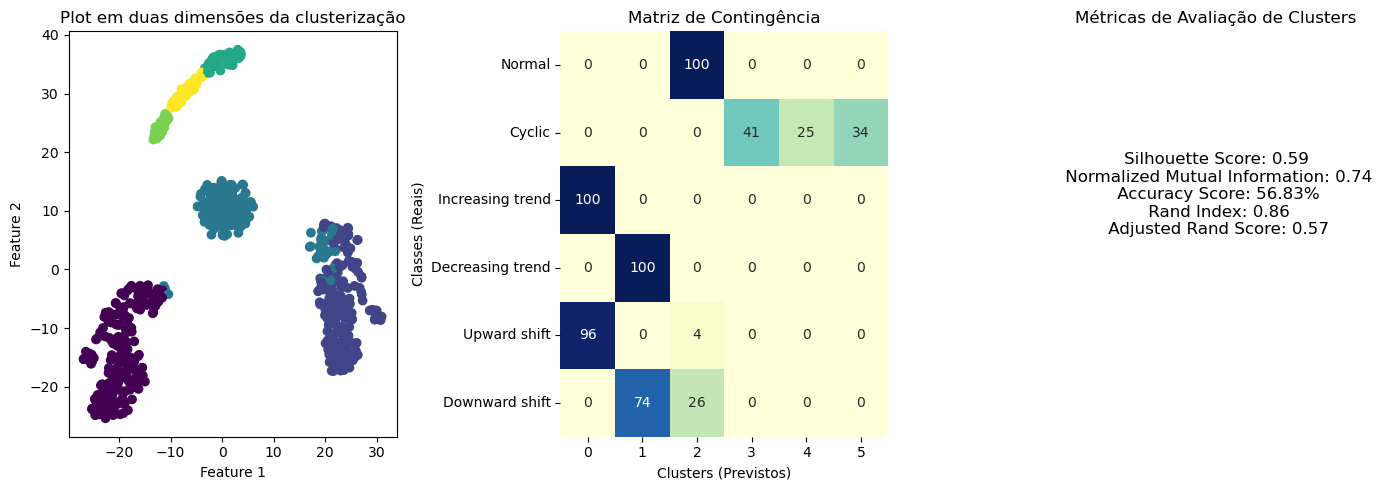

In [6]:
# Synthetic Control

plot_cluster_evaluation(X_syn_ctrl_2d, y_syn_ctrl, km_labels_syn_control, syn_ctrl_target_names)

**<font size = 6>Observação</font>** : Vemos que classes diferentes que tem "tendências" parecidas ficaram no mesmo cluster:

Normal e Cyclic (Permanecer no mesmo nível)

Incresing Trend e Upward Shift (Aumentar de nível)

Decresing Trend e Downward shift (Diminuir o nível)

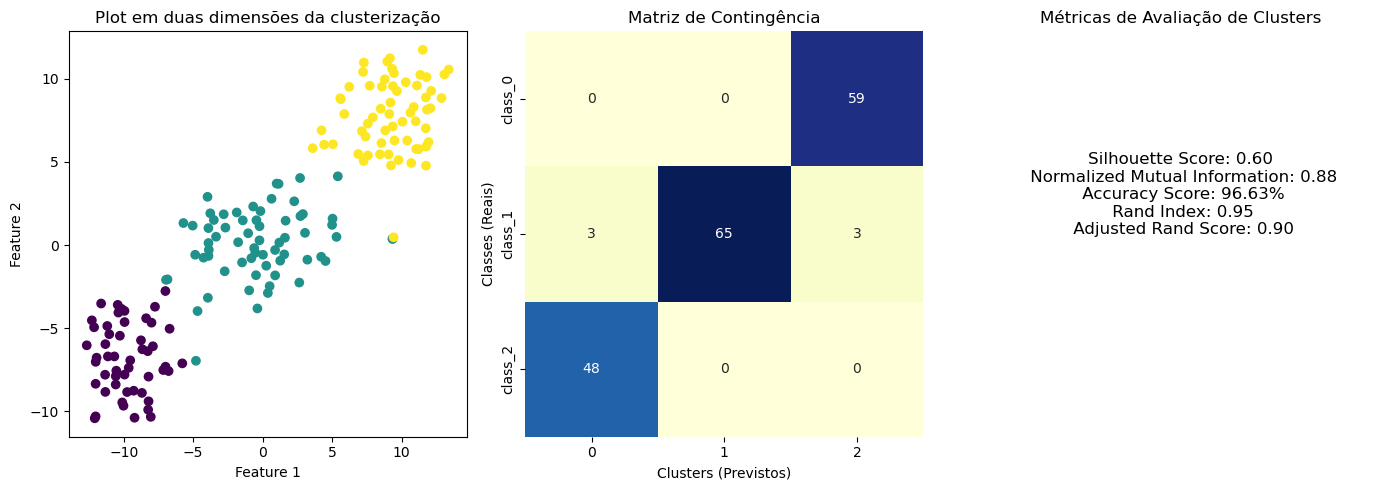

In [7]:
# Wine

plot_cluster_evaluation(X_wine_2d, y_wine, km_labels_wine, wine_target_names)

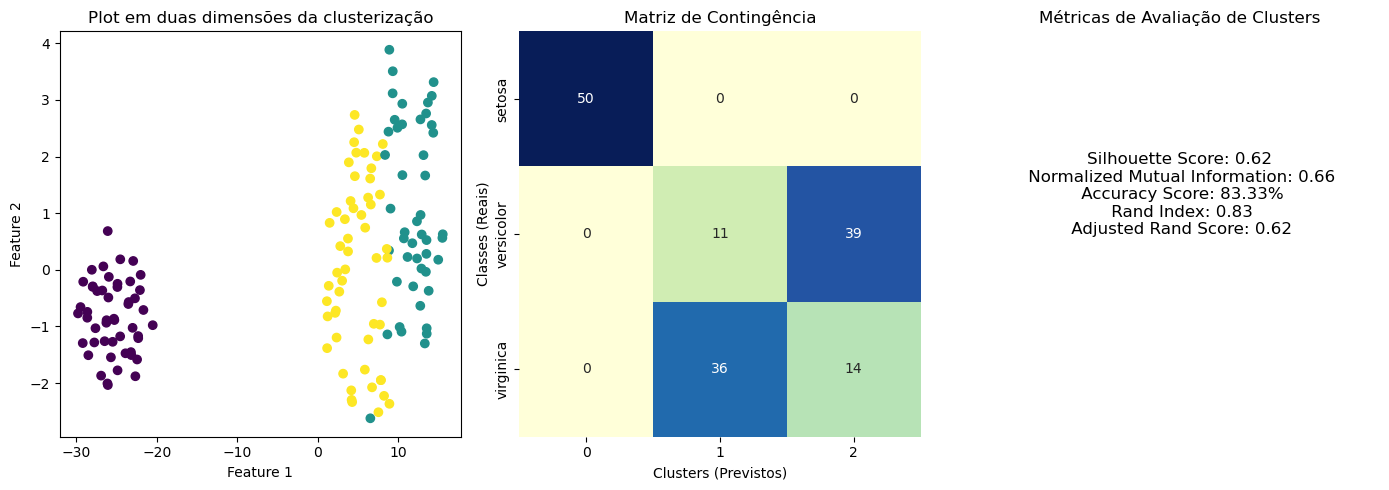

In [8]:
# Iris

plot_cluster_evaluation(X_iris_2d, y_iris, km_labels_iris, iris_target_names)